# Motion estimation


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
import cv2
import numpy as np

video_path = r"C:\Users\Radcoflex-Purchase\Desktop\COLLEGE\SEM 7\Image and Video Analytics\Lab 5\coke.mp4"
cap = cv2.VideoCapture(video_path)
output_path = r'C:\Users\Radcoflex-Purchase\Desktop\COLLEGE\SEM 7\Image and Video Analytics\Lab 5\output\annotated_output_video.mp4'
fourcc = cv2.VideoWriter_fourcc(*'XVID')

previous_frame = None
motion_timestamps = []
marked_frames = []
writer = cv2.VideoWriter(output_path, fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray_image = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    if previous_frame is None:
        previous_frame = gray_image
        continue

    difference = cv2.absdiff(previous_frame, gray_image)
    _, binary_image = cv2.threshold(difference, 30, 255, cv2.THRESH_BINARY)

    kernel = np.ones((5, 5), np.uint8)
    processed_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)

    motion_count = cv2.countNonZero(processed_image)

    if motion_count > 800:
        timestamp = cap.get(cv2.CAP_PROP_POS_MSEC)
        motion_timestamps.append(timestamp)

        contours, _ = cv2.findContours(processed_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        for contour in contours:
            if cv2.contourArea(contour) > 500:
                x, y, w, h = cv2.boundingRect(contour)
                cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

        marked_frames.append((frame.copy(), timestamp))

    previous_frame = gray_image
    writer.write(frame)

cap.release()
writer.release()
cv2.destroyAllWindows()


In [34]:
prev_frame = None
motion_timestamps = []
marked_frames = []

print("Detected motion timestamps:")
for timestamp in motion_timestamps:
    print(f'Motion observed at: {timestamp:.2f} ms')

frames_to_show = min(5, len(marked_frames))

plt.figure(figsize=(15, 5))
for i in range(frames_to_show):
    frame, timestamp = marked_frames[i]
    plt.subplot(1, frames_to_show, i + 1)
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.title(f'Motion at {timestamp:.2f} ms')
    plt.axis('off')

plt.tight_layout()
plt.show()

print(f"Annotated video can be found at {output_path}")


Detected motion timestamps:


<Figure size 1500x500 with 0 Axes>

Annotated video can be found at C:\Users\Radcoflex-Purchase\Desktop\COLLEGE\SEM 7\Image and Video Analytics\Lab 5\output\annotated_output_video.mp4


In [13]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load a single image
def load_image(image_path):
    image = cv2.imread(image_path)
    return image


In [54]:
def assess_facial_expression(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    detected_faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5)

    emotions = []
    features = []

    for (x, y, w, h) in detected_faces:
        region_of_interest = gray_image[y:y + h, x:x + w]
        mouth_area = region_of_interest[int(h * 0.5):h, :]
        mouth_brightness = np.mean(mouth_area)

        if mouth_brightness > 120:
            emotion = "Happy"
        elif mouth_brightness < 40:
            emotion = "Sad"
        else:
            emotion = "Neutral"

        emotions.append(emotion)
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
        cv2.putText(image, emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)

        features.append({
            "Mouth Brightness": mouth_brightness,
            "Face Width": w,
            "Face Height": h,
            "X Coordinate": x,
            "Y Coordinate": y,
        })

    return emotions, image, features


In [36]:
def tally_sentiments(sentiments):
    counts = {"Happy": 0, "Sad": 0, "Neutral": 0}
    
    for sentiment in sentiments:
        counts[sentiment] += 1
    
    return counts

def get_dominant_sentiment(sentiment_counts):
    dominant_sentiment = max(sentiment_counts, key=sentiment_counts.get)
    count_of_dominant = sentiment_counts[dominant_sentiment]
    
    return dominant_sentiment, count_of_dominant


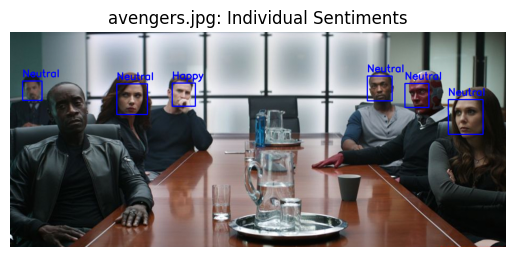

Sentiment Counts: {'Happy': 1, 'Sad': 0, 'Neutral': 5}
Highest Sentiment: Neutral with Count: 5
Face 1:
  Mouth Intensity: 80.36206896551724
  Face Width: 58
  Face Height: 58
  X Position: 955
  Y Position: 124
Face 2:
  Mouth Intensity: 63.10993425858291
  Face Width: 74
  Face Height: 74
  X Position: 258
  Y Position: 125
Face 3:
  Mouth Intensity: 68.46995464852608
  Face Width: 84
  Face Height: 84
  X Position: 1060
  Y Position: 163
Face 4:
  Mouth Intensity: 77.27482269503547
  Face Width: 47
  Face Height: 47
  X Position: 30
  Y Position: 118
Face 5:
  Mouth Intensity: 82.15777777777778
  Face Width: 60
  Face Height: 60
  X Position: 864
  Y Position: 106
Face 6:
  Mouth Intensity: 157.0701530612245
  Face Width: 56
  Face Height: 56
  X Position: 392
  Y Position: 123


In [16]:
#Load and analyze a single image
image_path = r"C:\Users\Radcoflex-Purchase\Desktop\COLLEGE\SEM 7\Image and Video Analytics\Lab 5/avengers.jpg"  # Change to your image file
image = load_image(image_path)

# Analyze facial expressions
sentiments, annotated_image, numerical_features = analyze_facial_expression(image)

# Count sentiments
sentiment_counts = count_sentiments(sentiments)

# Find the highest sentiment
highest_sentiment, highest_count = find_highest_sentiment(sentiment_counts)

# Display the annotated image
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.title(f"{os.path.basename(image_path)}: Individual Sentiments")
plt.axis('off')
plt.show()

# Output the counts and the highest sentiment
print(f"Sentiment Counts: {sentiment_counts}")
print(f"Highest Sentiment: {highest_sentiment} with Count: {highest_count}")

# Print numerical features for each face detected
for idx, features in enumerate(numerical_features):
    print(f"Face {idx + 1}:")
    for feature, value in features.items():
        print(f"  {feature}: {value}")


In [37]:


face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def get_jawline_width(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    detected_faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5)

    if len(detected_faces) == 0:
        return None

    for (x, y, w, h) in detected_faces:
        left_jaw = (x, y + int(h * 0.75))
        right_jaw = (x + w, y + int(h * 0.75))
        jaw_width = right_jaw[0] - left_jaw[0]
        return jaw_width

def get_eye_distance(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    detected_faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5)

    if len(detected_faces) == 0:
        return None

    for (x, y, w, h) in detected_faces:
        left_eye = (x + int(w * 0.25), y + int(h * 0.4))
        right_eye = (x + int(w * 0.75), y + int(h * 0.4))
        distance = np.linalg.norm(np.array(left_eye) - np.array(right_eye))
        return distance


In [38]:
image_folder = r"C:\Users\Radcoflex-Purchase\Desktop\COLLEGE\SEM 7\Image and Video Analytics\Lab 5\gender/"
gender_mapping = {'men': 0, 'women': 1}
jawline_measurements = []
eye_distance_measurements = []
collected_images = []

for gender, label in gender_mapping.items():
    folder_path = os.path.join(image_folder, gender)
    count = 0
    for filename in os.listdir(folder_path):
        if count >= 20:
            break
        if filename.endswith(('.jpg', '.png')):
            image_path = os.path.join(folder_path, filename)
            img = cv2.imread(image_path)

            if img is None:
                print(f"Could not load image: {image_path}")
                continue

            jawline_width = get_jawline_width(img)
            eye_distance = get_eye_distance(img)

            if jawline_width is not None and eye_distance is not None:
                jawline_measurements.append((gender, jawline_width))
                eye_distance_measurements.append((gender, eye_distance))
                collected_images.append((img, gender, jawline_width, eye_distance))
                count += 1

jawline_values = [width for _, width in jawline_measurements]
eye_distance_values = [distance for _, distance in eye_distance_measurements]


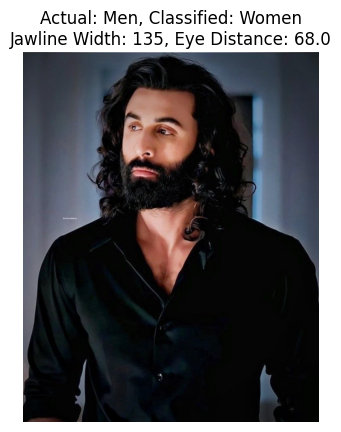

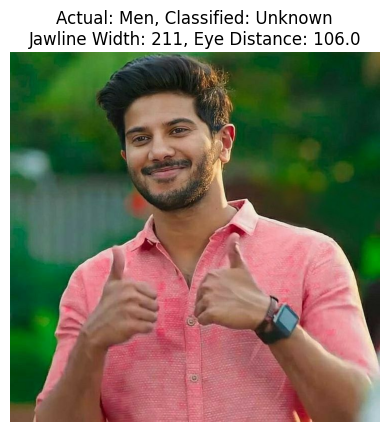

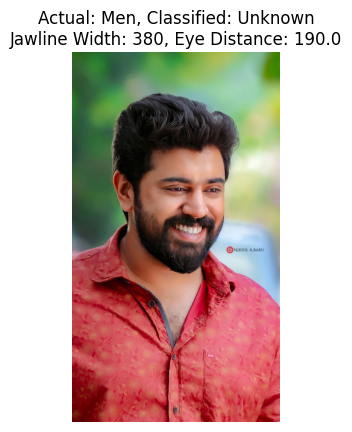

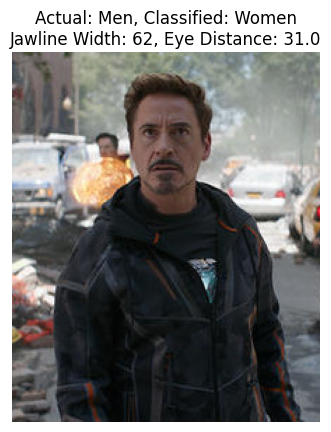

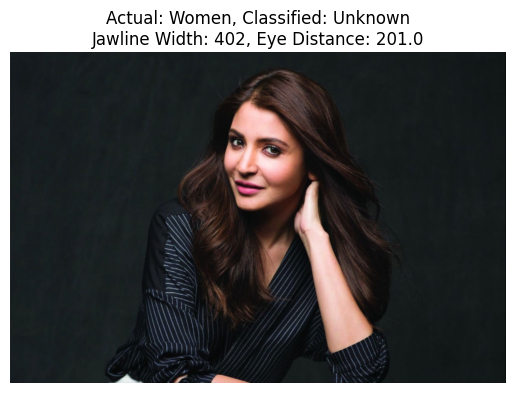

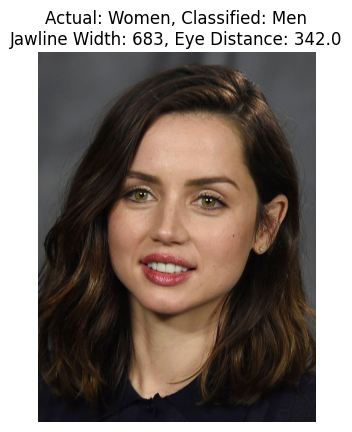

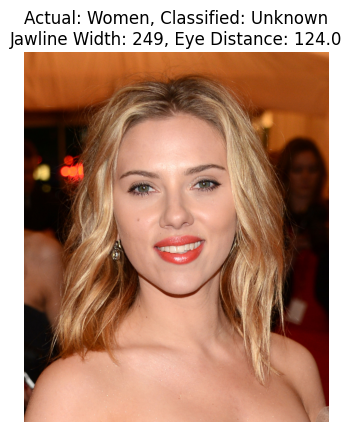

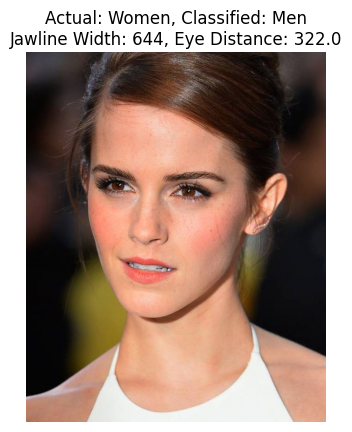

In [39]:
mean_jawline_men = np.mean([width for gender, width in jawline_measurements if gender == 'men'])
mean_jawline_women = np.mean([width for gender, width in jawline_measurements if gender == 'women'])
mean_eye_men = np.mean([distance for gender, distance in eye_distance_measurements if gender == 'men'])
mean_eye_women = np.mean([distance for gender, distance in eye_distance_measurements if gender == 'women'])

classification_results = []
threshold_margin = 50

for (img, actual_gender, jawline_width, eye_distance) in collected_images:
    classified_gender = None
    if jawline_width > mean_jawline_women + threshold_margin and eye_distance > mean_eye_women:
        classified_gender = 'Men'
    elif jawline_width < mean_jawline_men - threshold_margin and eye_distance < mean_eye_men:
        classified_gender = 'Women'
    else:
        classified_gender = 'Unknown'

    classification_results.append((img, actual_gender, classified_gender, jawline_width, eye_distance))

for img, actual_gender, classified_gender, jawline_width, eye_distance in classification_results:
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Actual: {actual_gender.capitalize()}, Classified: {classified_gender}\n"
              f"Jawline Width: {jawline_width}, Eye Distance: {eye_distance}")
    plt.axis('off')
    plt.show()
